<a href="https://colab.research.google.com/github/AlenaAntipina/PytorchLearning/blob/main/MyFirstNN_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize'] = (13.0, 5.0)

Target function

In [20]:
def targt_function(x):
  return 2**x * torch.sin(2**-x)

Train dataset

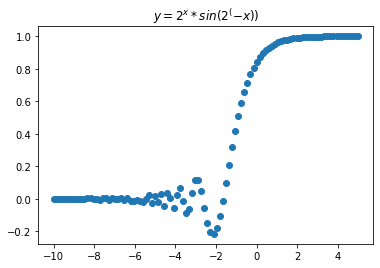

In [21]:
x_train = torch.linspace(-10, 5, 100)
y_train = targt_function(x_train)

plt.plot(x_train.numpy(), y_train.numpy(), 'o')
plt.title('$y = 2^x * sin(2^(-x))$');

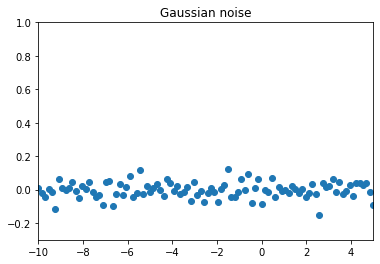

In [22]:
noise = torch.randn(y_train.shape) / 20.

plt.plot(x_train.numpy(), noise.numpy(), 'o')
plt.axis([-10, 5, -0.3, 1])
plt.title('Gaussian noise');

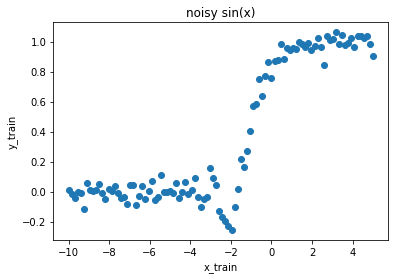

In [23]:
y_train = y_train + noise
plt.plot(x_train.numpy(), y_train.numpy(), 'o')
plt.title('noisy sin(x)')
plt.xlabel('x_train')
plt.ylabel('y_train');

In [24]:
x_train.unsqueeze_(1)
y_train.unsqueeze_(1);

Validation dataset

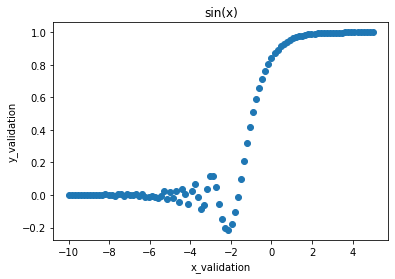

In [26]:
x_validation = torch.linspace(-10, 5, 100)
y_validation = targt_function(x_validation)
plt.plot(x_validation.numpy(), y_validation.numpy(), 'o')
plt.title('sin(x)')
plt.xlabel('x_validation')
plt.ylabel('y_validation');

In [27]:
x_validation.unsqueeze_(1)
y_validation.unsqueeze_(1);

Model Construction

In [87]:
class RegressionNet(torch.nn.Module):
    def __init__(self, n_hidden_neurons):
        super(RegressionNet, self).__init__()
        self.fc1 = torch.nn.Linear(1, n_hidden_neurons)
        self.act1 = torch.nn.Tanh()
        self.fc2 = torch.nn.Linear(n_hidden_neurons, n_hidden_neurons)
        self.act2 = torch.nn.Tanh()
        self.fc3 = torch.nn.Linear(n_hidden_neurons, 1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.act1(x)
        x = self.fc2(x)
        x = self.act2(x)
        x = self.fc3(x)
        return x

net = RegressionNet(20)

Prediction

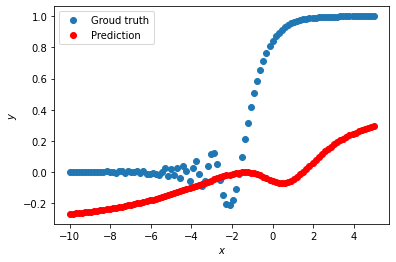

In [88]:
def predict(net, x, y):
    y_pred = net.forward(x)

    plt.plot(x.numpy(), y.numpy(), 'o', label='Groud truth')
    plt.plot(x.numpy(), y_pred.data.numpy(), 'o', c='r', label='Prediction');
    plt.legend(loc='upper left')
    plt.xlabel('$x$')
    plt.ylabel('$y$')

predict(net, x_validation, y_validation)

Optimizer

In [89]:
optimizer = torch.optim.Adam(net.parameters(), lr=0.01)

Loss Function

In [90]:
def loss(pred, target):
    modul = abs(pred - target)
    return modul.mean()

Training Procedure

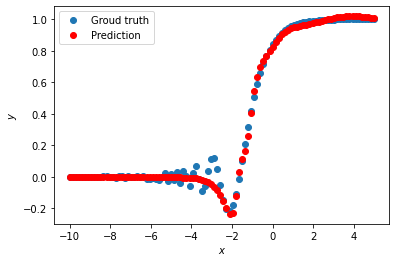

In [91]:
for epoch_index in range(2000):
    optimizer.zero_grad()

    y_pred = net.forward(x_train)
    loss_val = loss(y_pred, y_train)

    loss_val.backward()

    optimizer.step()

predict(net, x_validation, y_validation)

Test

In [92]:
def metric(pred, target):
   return (pred - target).abs().mean()

print(metric(net.forward(x_validation), y_validation).item())

0.02088727243244648
